In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("..\medical_insurance.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [2]:
x = df["bmi"].to_numpy()
x

array([27.9  , 33.77 , 33.   , ..., 26.03 , 18.715, 31.6  ])

In [3]:
y = df["charges"].to_numpy()
y

array([16884.924  ,  1725.5523 ,  4449.462  , ..., 16450.8947 ,
       21595.38229,  9850.432  ])

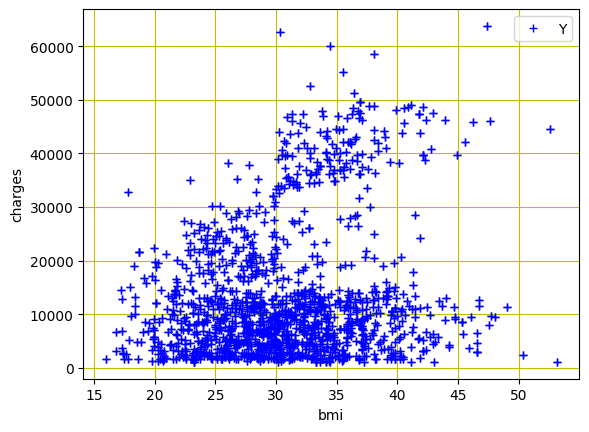

In [4]:
plt.plot(x, y, "b+", label="Y")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend()
plt.grid(True, color="y")
plt.show()

In [5]:
import sklearn
import sklearn.model_selection

# train test split, 0.7 and 0.3
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
print(len(x_train), ",", len(x_test), ",", len(y_train), ",", len(y_test))

x_train = x_train.astype(np.float32)
x_train = x_train.reshape(-1, 1)

x_test = x_test.astype(np.float32)
x_test = x_test.reshape(-1, 1)

y_train = y_train.astype(np.float32)
y_train = y_train.reshape(-1, 1)

y_test = y_test.astype(np.float32)
y_test = y_test.reshape(-1, 1)

print(x_train.dtype)


1940 , 832 , 1940 , 832
float32


In [6]:
1940 + 832

2772

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim) -> None:
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim=input_dim, output_dim=output_dim)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device=device)

criterion = nn.MSELoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
epochs = 100
loss_list = []

for epoch in range(epochs):
    epoch += 1

    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    loss_list.append(loss)

    loss.backward()

    optimizer.step()

    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 1, loss 320536128.0
epoch 2, loss 62830215168.0
epoch 3, loss 21633901264896.0
epoch 4, loss 7465461151170560.0
epoch 5, loss 2.576209070193115e+18
epoch 6, loss 8.890077516931688e+20
epoch 7, loss 3.0678207211113754e+23
epoch 8, loss 1.0586549530413764e+26
epoch 9, loss 3.653246559098696e+28
epoch 10, loss 1.2606759444971267e+31
epoch 11, loss 4.350388074127292e+33
epoch 12, loss inf
epoch 13, loss inf
epoch 14, loss inf
epoch 15, loss inf
epoch 16, loss inf
epoch 17, loss inf
epoch 18, loss inf
epoch 19, loss inf
epoch 20, loss inf
epoch 21, loss inf
epoch 22, loss inf
epoch 23, loss inf
epoch 24, loss inf
epoch 25, loss inf
epoch 26, loss inf
epoch 27, loss inf
epoch 28, loss inf
epoch 29, loss nan
epoch 30, loss nan
epoch 31, loss nan
epoch 32, loss nan
epoch 33, loss nan
epoch 34, loss nan
epoch 35, loss nan
epoch 36, loss nan
epoch 37, loss nan
epoch 38, loss nan
epoch 39, loss nan
epoch 40, loss nan
epoch 41, loss nan
epoch 42, loss nan
epoch 43, loss nan
epoch 44, loss na

In [18]:
# get float values out of tensors
loss_list_float = [x.item() for x in loss_list]
loss_list_float

[320536128.0,
 62830215168.0,
 21633901264896.0,
 7465461151170560.0,
 2.576209070193115e+18,
 8.890077516931688e+20,
 3.0678207211113754e+23,
 1.0586549530413764e+26,
 3.653246559098696e+28,
 1.2606759444971267e+31,
 4.350388074127292e+33,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

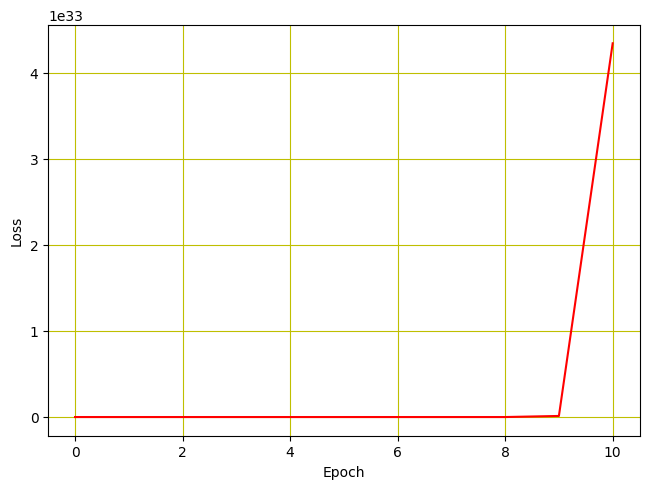

In [19]:
plt.plot(loss_list_float, "r")
plt.tight_layout()
plt.grid("True", color="y")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()